In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import Workbook
from openpyxl.drawing.image import Image
from openpyxl import load_workbook
import io

In [2]:
input_file_path = 'input_file.xlsx'
output_file_path = 'output_with_plot.xlsx'
sheet_name = 'Employees'

In [3]:
# Step 1: Read the Excel sheet
df = pd.read_excel(input_file_path, sheet_name=sheet_name)

In [4]:
# Step 2: Clean the data
# Drop rows where 'Name' is null
df = df.dropna(subset=['Name'])

# Fill missing values for numeric columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
  mean_value = df[column].mean()
  df.loc[df[column].isna(), column] = mean_value

# Convert 'Name' column to uppercase
df['Name'] = df['Name'].str.upper()

In [5]:
df

,Name,Age,Salary
0,ALICE,25.000000,50000.0
1,BOB,30.000000,60000.0
2,CHARLIE,35.000000,70000.0
3,DAVID,28.000000,80000.0
4,EVE,40.000000,64000.0
5,FRANK,22.000000,45000.0
6,GRACE,32.000000,60000.0
8,HANNAH,27.000000,55000.0
9,IVY,29.000000,64000.0
10,JACK,31.058824,70000.0


In [6]:
# Step 3: Analyze the data
avg_salary = df['Salary'].mean()
max_salary = df['Salary'].max()
min_salary = df['Salary'].min()
std_salary = df['Salary'].std()

analysis_df = pd.DataFrame({
  'Average Salary': [avg_salary],
  'Max Salary': [max_salary],
  'Min Salary': [min_salary],
  'Standard Deviation': [std_salary]
})

0

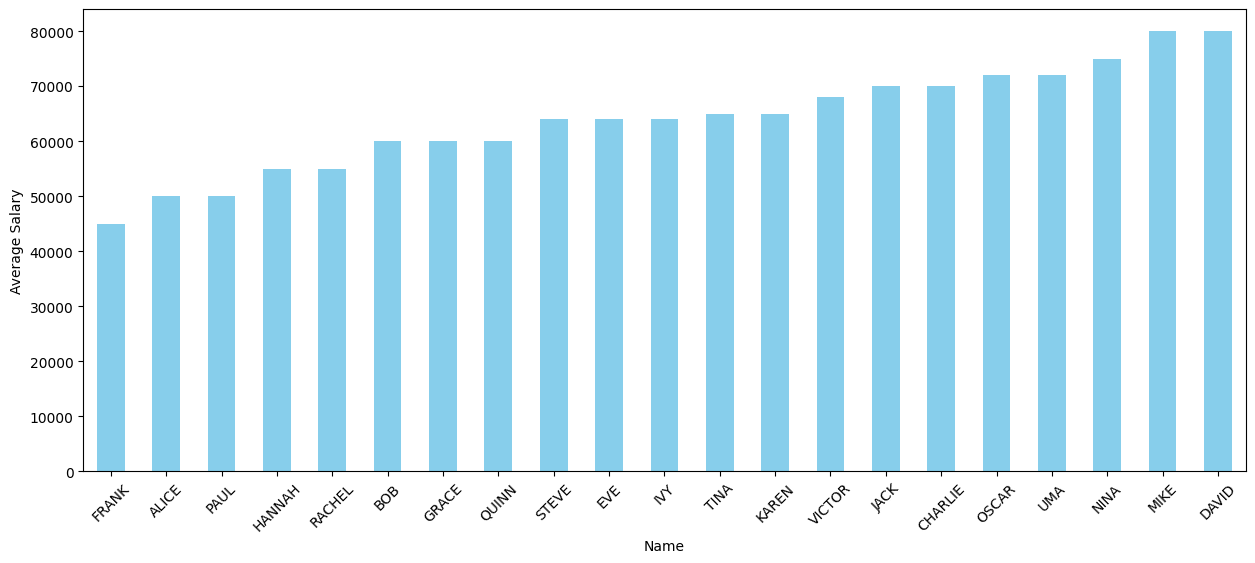

In [7]:
# Step 4: Create a plot
plt.figure(figsize=(15, 6))

# Group by 'Name' and calculate the average salary. Then sort the value
avg_salary = df.groupby('Name')['Salary'].mean().sort_values()

# Create a bar plot
avg_salary.plot(kind='bar', color='skyblue')
plt.xlabel('Name')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)

# Save the plot to a BytesIO object
img_stream = io.BytesIO() # provides an in-memory binary stream on file object
plt.savefig(img_stream, format='png')
# Now img_stream contains the PNG image in memory
img_stream.seek(0)

In [8]:
# Step 5: Write to a new Excel file with the plot and analysis


# Create a new Excel writer
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    # Write the cleaned DataFrame to a sheet
    df.to_excel(writer, sheet_name='Data', index=False)

    # Write the analysis DataFrame to a new sheet
    analysis_df.to_excel(writer, sheet_name='Analysis', index=False)


In [9]:
# Now load the workbook to add the plot
# load_workbook is a function from the openpyxl library in Python,
# which is used to read and manipulate Excel files in the .xlsx format.
workbook = load_workbook(output_file_path)

# Create a new sheet for the plot
worksheet = workbook.create_sheet(title='Plot')

# Load the plot image
img = Image(img_stream)
worksheet.add_image(img, 'A1')

# Save the workbook with the plot included
workbook.save(output_file_path)
workbook.close()